In [27]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import seaborn as sns

In [10]:
with open("aliyah lengths.json", 'r', encoding='utf-8') as file:
    data = json.load(file)

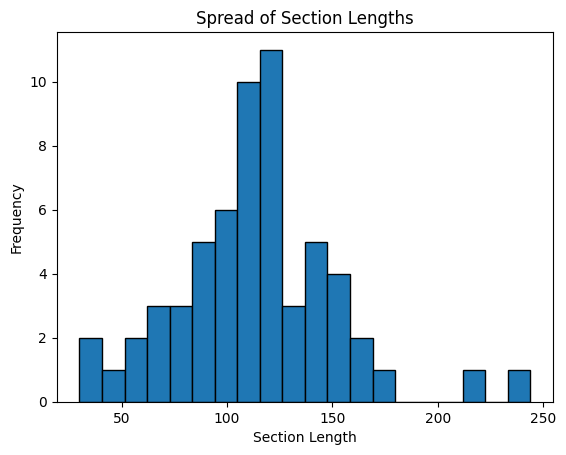

In [12]:
# Extract section lengths
section_lengths = [parsha["length"] for parsha in data]

# Plotting
plt.hist(section_lengths, bins=20, edgecolor='black')
plt.title('Spread of Section Lengths')
plt.xlabel('Section Length')
plt.ylabel('Frequency')
plt.show()

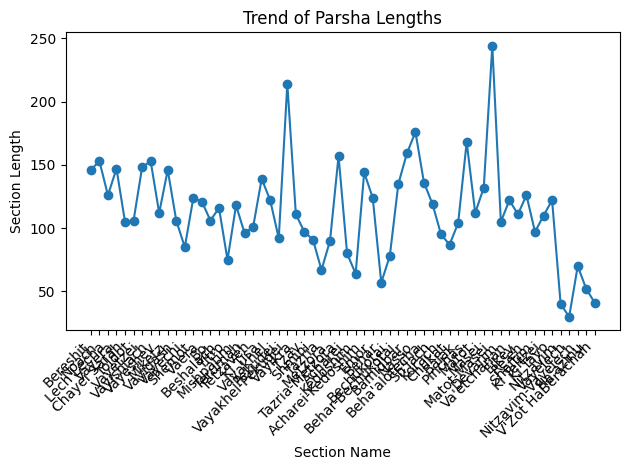

In [14]:
sections = data
section_names = [section["name"] for section in sections]
section_lengths = [section["length"] for section in sections]

# Plotting
plt.plot(section_names, section_lengths, marker='o')
plt.title('Trend of Parsha Lengths')
plt.xlabel('Section Name')
plt.ylabel('Section Length')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

In [30]:
aliyah_percents = [
    (aliyah_length / parsha['length'] ) * 100
    for parsha in data
    for aliyah_length in parsha['aliyah_lengths']
]

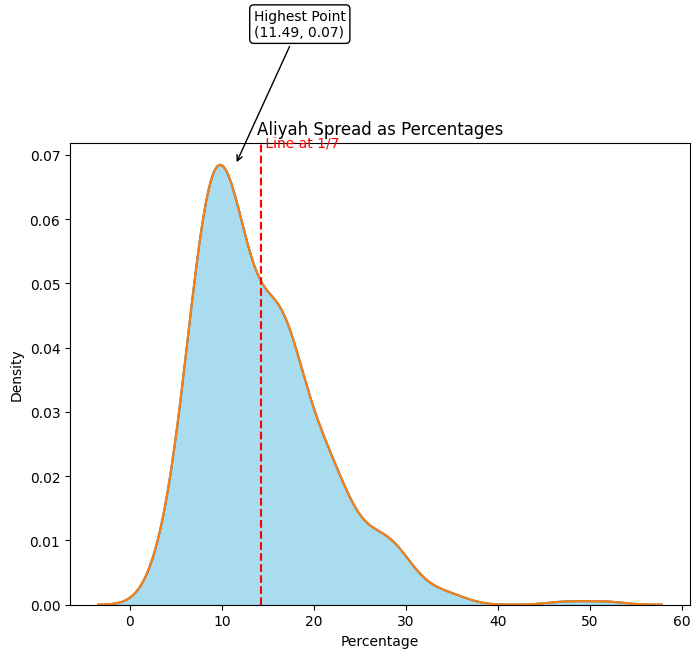

In [53]:
percentages = aliyah_percents

# Plotting a kernel density plot
plt.figure(figsize=(8, 6))
sns.kdeplot(percentages, fill=True, color='skyblue', alpha=0.7)
plt.title('Aliyah Spread as Percentages')
plt.xlabel('Percentage')
plt.ylabel('Density')

# Find the coordinates of the highest point
max_x = percentages[sns.kdeplot(percentages).get_lines()[0].get_data()[1].argmax()]
max_y = sns.kdeplot(percentages).get_lines()[0].get_data()[1].max()

# Annotate the highest point
plt.annotate(f'Highest Point\n({max_x:.2f}, {max_y:.2f})', xy=(max_x, max_y), xytext=(max_x + 2, max_y + 0.02),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

seventh = (1/7) * 100

# Adding a vertical line at x=1/7
plt.axvline(x=seventh, color='red', linestyle='--', label='Line at x=1/7')
plt.text(seventh, plt.ylim()[1], ' Line at 1/7', color='red', rotation=0, verticalalignment='center')


plt.show()

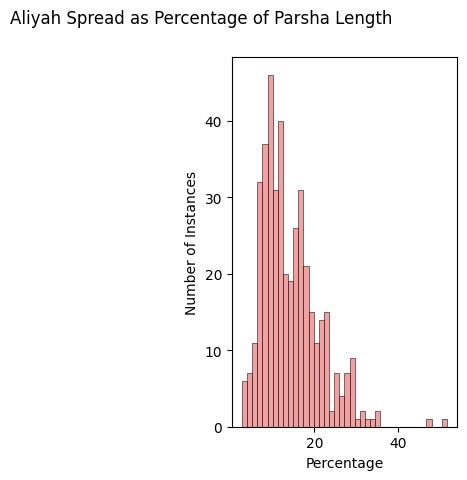

In [44]:
# Histogram plot
plt.subplot(1, 2, 2)
sns.histplot(percentages, bins=40, color='lightcoral', kde=False, label='Histogram')
plt.xlabel('Percentage')
plt.ylabel('Number of Instances')

plt.suptitle('Aliyah Spread as Percentage of Parsha Length')

plt.show()
